# 01. 웹에서 주문 수를 분석하는 테크닉 10 
이번 장의 목표: 어떤 기업 쇼핑몰 사이트의 상품 주문 수의 추세를 분석함으로써 판매량 개선의 방향을 찾아보자.  
## tech 1. 데이터를 읽어들이자.

이 쇼핑몰의 주요 품목은 컴퓨터입니다. 데이터는 4종류 총 6개가 있습니다.(모두 csv 파일)   
- cm: 고객 정보 데이터 (customer_master)
- im: 상품 정보 데이터 (item_master)
- transaction 1,2 : 구매내역 데이터 (너무 길어서 2개 데이터로 분할되어 있음)
- transaction_detail 1,2 : 구매내역 상세 데이터 (너무 길어서 분할되어 있음)

In [4]:
# 데이터 읽기 
import pandas as pd 
cm = pd.read_csv('1장/customer_master.csv')
cm.tail()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
4995,AS677229,정우석,2019-07-31 16:52,hirayama_risa@example.com,F,77,1941-10-17,대전광역시
4996,HD758694,정영훈,2019-07-31 19:09,nakahara_mahiru@example.com,F,27,1991-11-13,광주광역시
4997,PL538517,정준기,2019-07-31 19:30,tabata_yuu1@example.com,F,73,1945-12-28,대전광역시
4998,OA955088,정도형,2019-07-31 22:32,setouchi_hikaru@example.com,F,75,1944-04-09,부산광역시
4999,HI349563,정지석,2019-07-31 22:49,horii_kanji@example.com,M,21,1998-02-06,서울특별시


In [5]:
im = pd.read_csv('1장/item_master.csv')
trans1 = pd.read_csv('1장/transaction_1.csv')
trans1d = pd.read_csv('1장/transaction_detail_1.csv')
display(im.head(), trans1.head(), trans1d.head())

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


## tech 2. 데이터를 결합하자. (세로 방향 조인)
transaction 1,2 / transaction_detail 1,2를 세로로 결합해보자. 지금은 용량 때문에 나뉘어져 있으니까..

In [7]:
#1.
trans1 = pd.read_csv('1장/transaction_1.csv')
trans2 = pd.read_csv('1장/transaction_2.csv')
trans = pd.concat([trans1, trans2], ignore_index = True)
trans.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [8]:
print(trans1.shape, trans2.shape, trans.shape)

(5000, 4) (1786, 4) (6786, 4)


In [9]:
#2.
trans1d = pd.read_csv('1장/transaction_detail_1.csv')
trans2d = pd.read_csv('1장/transaction_detail_2.csv')
transd = pd.concat([trans1d, trans2d], ignore_index=True)
transd.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [10]:
print(trans1d.shape, trans2d.shape, transd.shape)

(5000, 4) (2144, 4) (7144, 4)


## tech 3. 매출 데이터를 결합하자. (가로 방향 조인)

In [12]:
#1. transd를 기준으로, trans 데이터를 붙인다.
## 단 trans 데이터에서 payment_date, customer_id를 붙이고 싶고 price는 붙일 필요가 없음 
##(왜냐면 transd의 item_price와 im의 item_price를 곱한 값과 같기 때문! 정보가 중복되므로..)

join_data = pd.merge(transd, trans[['transaction_id', 'payment_date', 'customer_id']], on ='transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [13]:
print(len(transd), len(trans), len(join_data)) #left join이므로 transd의 개수에 맞춰짐 

7144 6786 7144


In [15]:
join_data.isna().sum()

detail_id         0
transaction_id    0
item_id           0
quantity          0
payment_date      0
customer_id       0
dtype: int64

## tech 4. 마스터데이터를 결합하자.
이번엔 cm, im 데이터를 붙여보자!

In [14]:
display(cm.head(), im.head())

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [16]:
join_data = pd.merge(join_data, cm, on = 'customer_id', how='left')
join_data = pd.merge(join_data, im, on = 'item_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [17]:
print(len(join_data)) #행 개수는 그대로. left join이므로 

7144


## tech 5. 필요한 데이터 칼럼을 만들자
price 컬럼을 새로 만들자! (quantity * item_price)

In [18]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


데이터 가공은 한번 집계를 잘못하면 수치상 에러가 생기며, 잘못된 데이터를 제공하면 회사 경영에 막대한 영향을 미칩니다..  
그러니 데이터를 결합할 땐 신중히 개수를 확인하며, 되도록 검산이 가능한 데이터 칼럼을 찾고 계산합시다!

## tech 6. 데이터를 검산하자 
데이터 가공 전 trans의 price 총합과, 데이터 가공 후의 join_data의 price의 총합이 같은지를 보면 검산이 된다.

In [20]:
trans['price'].sum()

971135000

In [21]:
join_data['price'].sum()

971135000

In [22]:
#숫자가 복잡한 경우는 이렇게 T/F만 판단 
print(trans['price'].sum() == join_data['price'].sum())

True


## tech 7. 각종 통계량을 파악하자 (데이터 분석의 시작!)
- 1. 결측값의 개수 파악하기 + 필요하다면 보완하기 
- 2. 전체를 파악할 수 있는 기초통계량

In [23]:
#결측치
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [24]:
#기초통계량
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


위의 기초통계를 해석하는 것이 데싸의 의무. 예를 들면 이런 식으로 생각해봐야 한다. -> 궁금한 것, 새로운 것들을 뽑아서 이후 분석에 활용  
- price에선 가장 비싼 게 42만원(-> 가장 높은 단가 21만원 컴퓨터 2대를 샀군?). 평균은 13.6만원 정도. 
- quantity를 보면 평균적으로 1.2, 75% percentile은 1이므로, 보통 1대 정도를 사는구나.
- age 평균은 50세. 좀 나이가 많은 분들이 구매를 하는 듯.. 나이 범위는 20세~80세로 넓다.
- item_price(상품가격)은 평균이 12만원, 가장 싼거는 5만원~비싼건 21만원.

In [27]:
#꼭 확인: 데이터의 기간. (산정할 때 필요)
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


## tech 8. 월별로 데이터 집계하기
전체적인 분위기를 파악했으므로, 월별로 매출현황이 어떻게 되는지를 알아보자. (그리고 전체 데이터를 한번에 분석하지 말고, 시간의 영향을 많이 받을 수 있으니 이런 경우는 떼어서 보는 게 더 좋다)  
이 데이터는 6개월 자료이므로 시간의 영향이 크지는 않을 듯하다.  
월별로 전체적으로 매출이 늘어나고 있는지, 줄어들고 있는지를 파악해보자.

In [29]:
#payment_date에서 연월을 추출해 새롭게 컬럼을 작성 후, 이를 단위로 하여 price를 집계하기
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000


In [32]:
join_data.dtypes #payment_date는 str임. 향후 편의를 위해 datetime으로 변환해서 살펴보자.

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [33]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data.dtypes

detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
item_name                    object
item_price                    int64
price                         int64
dtype: object

In [34]:
#연월만 떼기
join_data['payment_ym'] = join_data['payment_date'].dt.strftime("%Y-%m")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price,payment_ym
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,2019-02
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000,2019-02
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000,2019-02
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,2019-02
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000,2019-02


In [72]:
join_data.dtypes

detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
item_name                    object
item_price                    int64
price                         int64
payment_ym                   object
dtype: object

In [35]:
#이제 연월만 뗐으니 이걸 기준으로 price 합계가 얼마인지를 알아보자.
join_data.groupby('payment_ym')['price'].sum()

payment_ym
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: price, dtype: int64

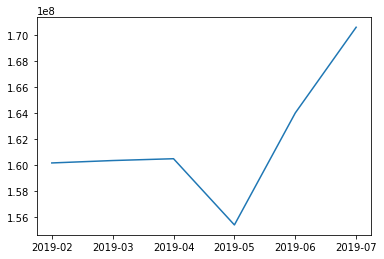

In [36]:
#눈으로 보기 쉽게 하기 위해 시각화 
import matplotlib.pyplot as plt
plt.plot(join_data.groupby('payment_ym')['price'].sum())

보면 5월에 줄었다가 6월 회복세, 7월에 확 늘음.  
한달에 약 1억 6천 정도의 매출이 나오고 있음.

In [39]:
a = join_data.groupby('payment_ym')['price'].sum().to_frame()
a.reset_index(inplace=True)
a

,payment_ym,price
0,2019-02,160185000
1,2019-03,160370000
2,2019-04,160510000
3,2019-05,155420000
4,2019-06,164030000
5,2019-07,170620000


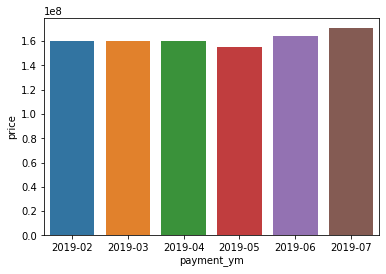

In [42]:
import seaborn as sns
sns.barplot(a['payment_ym'], a['price'])

## tech 9. 월별, 상품별로 데이터를 집계해 보자.
월별뿐 아니라 상품별로도 집계해보기

In [45]:
join_data.groupby(['payment_ym', 'item_name'])[['price', 'quantity']].sum()

price  quantity
payment_ym item_name                    
2019-02    PC-A       24150000       483
           PC-B       25245000       297
           PC-C       19800000       165
           PC-D       31140000       173
           PC-E       59850000       285
2019-03    PC-A       26000000       520
           PC-B       25500000       300
           PC-C       19080000       159
           PC-D       25740000       143
           PC-E       64050000       305
2019-04    PC-A       25900000       518
           PC-B       23460000       276
           PC-C       21960000       183
           PC-D       24300000       135
           PC-E       64890000       309
2019-05    PC-A       24850000       497
           PC-B       25330000       298
           PC-C       20520000       171
           PC-D       25920000       144
           PC-E       58800000       280
2019-06    PC-A       26000000       520
           PC-B       23970000       282
           PC-C       21840000       182
           PC-D       28800000       160
           PC-E       63420000       302
2019-07    PC-A       25250000       505
           PC-B       28220000       332
           PC-C       19440000       162
           PC-D       26100000       145
           PC-E       71610000       341

In [47]:
#위의 결과가 직관적으로 이해가 힘드므로 pivot_table을 활용한다.
## 인덱스로는 item_name(row), ym(column) 으로 하고 ->즉, 상품명과 연월별 price / quantity 현황을 만들자.
join_data.pivot_table(index = 'item_name', columns = 'payment_ym', values = ['price', 'quantity'], aggfunc = 'sum')

price                                                    \
payment_ym   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   
item_name                                                                
PC-A        24150000  26000000  25900000  24850000  26000000  25250000   
PC-B        25245000  25500000  23460000  25330000  23970000  28220000   
PC-C        19800000  19080000  21960000  20520000  21840000  19440000   
PC-D        31140000  25740000  24300000  25920000  28800000  26100000   
PC-E        59850000  64050000  64890000  58800000  63420000  71610000   

           quantity                                          
payment_ym  2019-02 2019-03 2019-04 2019-05 2019-06 2019-07  
item_name                                                    
PC-A            483     520     518     497     520     505  
PC-B            297     300     276     298     282     332  
PC-C            165     159     183     171     182     162  
PC-D            173     143     135     144     160     145  
PC-E            285     305     309     280     302     341

## tech 10. 상품별 매출 추이를 가시화(시각화)해보자.
현장에는 숫자에 익숙하지 못한 사람들도 있기 때문에, 항상 분석 결과는 간단히!! 보기 좋게!! 보여주는 게 좋다.  
대표적 방법이 시각화!

In [49]:
#이번엔 피벗테이블에서 행/열 인덱스의 위치를 바꾸기, price에 대해서만 집계
graph_data = join_data.pivot_table(index = 'payment_ym', columns = 'item_name', values='price', aggfunc='sum')
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_ym,,,,,
2019-02,24150000,25245000,19800000,31140000,59850000
2019-03,26000000,25500000,19080000,25740000,64050000
2019-04,25900000,23460000,21960000,24300000,64890000
2019-05,24850000,25330000,20520000,25920000,58800000
2019-06,26000000,23970000,21840000,28800000,63420000
2019-07,25250000,28220000,19440000,26100000,71610000


In [52]:
list(graph_data.index)

['2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07']

In [53]:
graph_data['PC-A']

payment_ym
2019-02    24150000
2019-03    26000000
2019-04    25900000
2019-05    24850000
2019-06    26000000
2019-07    25250000
Name: PC-A, dtype: int64

In [56]:
list(graph_data.columns)

['PC-A', 'PC-B', 'PC-C', 'PC-D', 'PC-E']

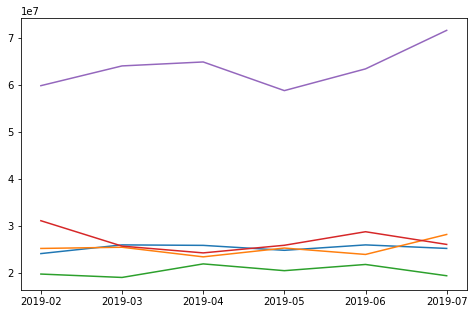

In [68]:
#위의 graph_data에서 가로축은 payment_ym, 세로축은 item별 price 집계값, item은 legend로 나타낼 것임.
plt.figure(figsize=(8,5))
plt.plot(graph_data)

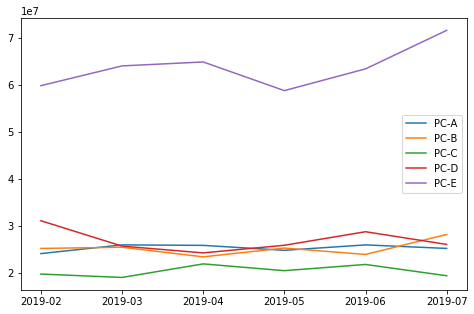

In [69]:
plt.figure(figsize=(8,5))
plt.plot(graph_data)
plt.legend(graph_data.columns) #이렇게 legend에 라벨 달아주기 

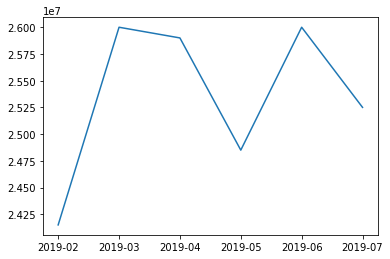

In [54]:
#손으로 일일이 label 달아줘도 됨.
plt.plot(list(graph_data.index), graph_data['PC-A'], label = 'PC-A')

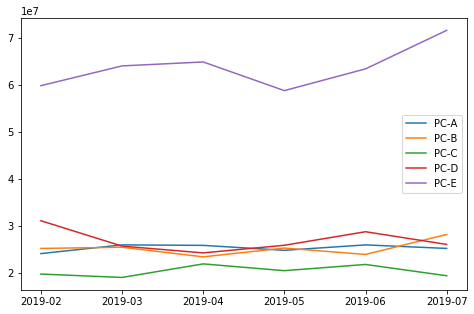

In [70]:
#모든 상품에 대해서 달아주면 
plt.figure(figsize=(8,5))
plt.plot(list(graph_data.index), graph_data['PC-A'], label = 'PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label = 'PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label = 'PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label = 'PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label = 'PC-E')
plt.legend()

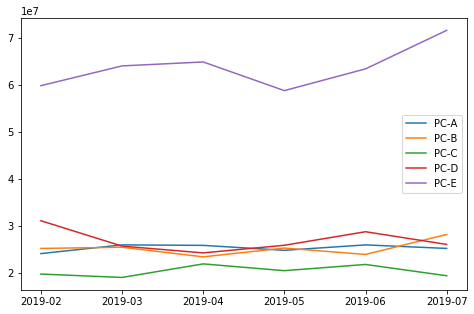

In [71]:
#자동화 
plt.figure(figsize=(8,5))
sy = list(graph_data.columns)
for ind, value in enumerate(sy):
    plt.plot(list(graph_data.index), graph_data[value], label=value)
plt.legend()

`그래프 해석` (현장 사람한테 말해주기!)
- 보면 PC-E가 가장 매출을 견인하는 기종입니다. 이 기종은 5월에 잠깐 매출이 안 나왔다가 6월에 회복, 7월에 다시 상승세를 보이며 그렇기에 전체 상품 매출액 또한 5월엔 매출이 적었다가 6월부터 회복하는 양상을 보입니다.